In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.8218 - loss: 0.4979
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9036 - loss: 0.2605
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9233 - loss: 0.2030
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 36ms/step - accuracy: 0.9367 - loss: 0.1703
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9519 - loss: 0.1336
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9586 - loss: 0.1110
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9666 - loss: 0.0929
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9726 - loss: 0.0756
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9783 - loss: 0.0597
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9817 - loss: 0.0508


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9144 - loss: 0.3529
Test accuracy: 0.9164000153541565


In [8]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


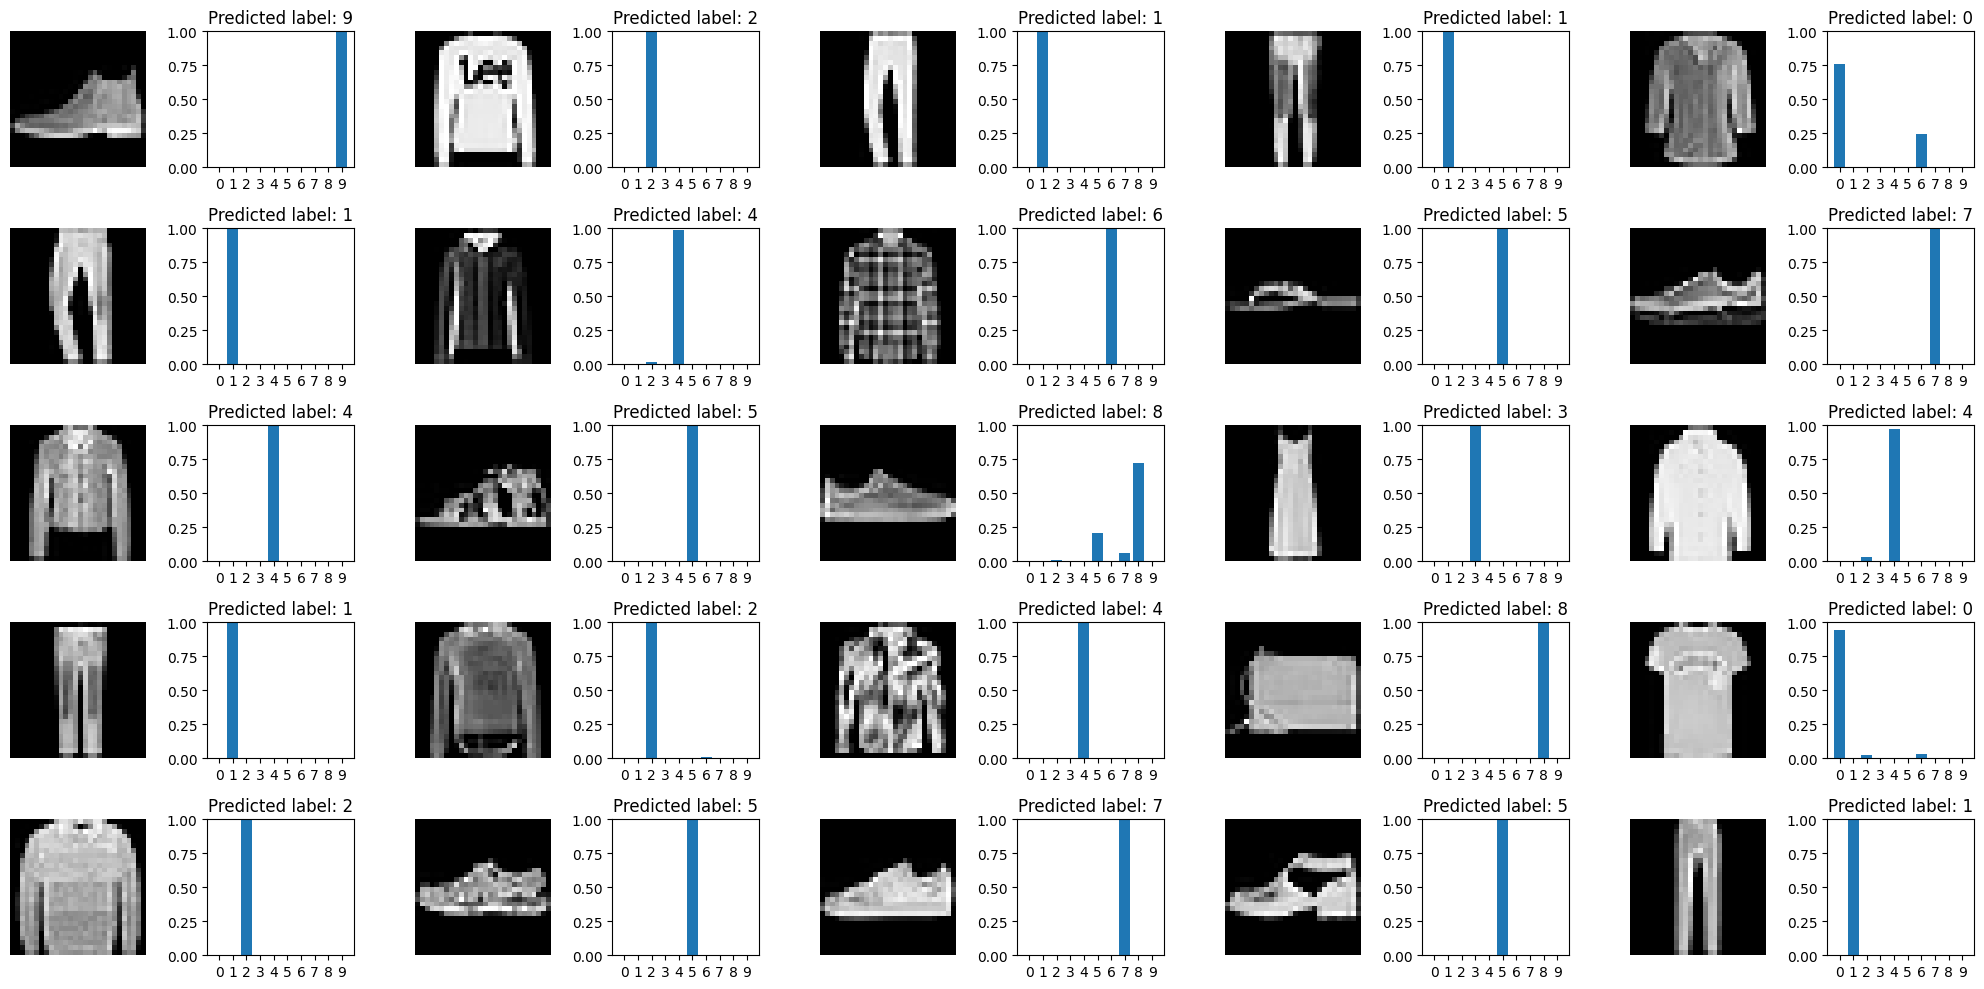

In [9]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.axis('off')

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10))
    plt.ylim([0, 1])
    plt.title(f"Predicted label: {predicted_labels[i]}")

plt.tight_layout()
plt.show()
